### Selenium 기초

- 동적인 웹 크롤링 라이브러리
    - 단순 페이지 로딩 + 페이지 이동 자동화 -> 웹페이지 메모리상 데이터를 가져오는 방식
    - 조금 크롤링 속도가 느린 단점

#### Selenium 설치
```shell
!pip install selenium
```

In [1]:
!pip install selenium

   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.4 MB 10.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.4 MB 11.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.4 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.4 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 9.4/9.4 MB 11.3 MB/s eta 0:00:00


#### 셀레니움 사용법
- 셀레니움 라이브러리
- WebDriver : 셀레니움이 웹 브라우저 프로세스를 관리할 수 있도록 해 주는 프로그램
    - 크롬 브라우저를 사용하면 ChromeDriver 다운로드 후 설치
    - 조심! 현재 크롬 브라우저 버전과 맞는 CromeDriver를 설치
    - 크롬 설정에서 현재 버전 확인
    - https://googlechromelabs.github.io/chrome-for-testing/에서 버전에 맞는 드라이버를 다운로드
    - chromedriver-win64.zip 다운 후 압축 해제
    - 특정 위치에 ChromeDriver 폴더 생성 chromedriver.exe 붙여넣기
    - ChromeDriver 위치를 시스템정보(sysdm.cpl > 고급 > 환경변수 > 시스템 변수) Path에 등록

- 셀레니움 사용등록

In [2]:
from selenium import webdriver

In [3]:
# 웹드라이버(크롬드라이버)에서 크롬 브라우저를 실행
driver = webdriver.Chrome()

In [4]:
### 웹사이트를 크롬드라이버가 제어하는 브라우저에 오픈
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

In [6]:
### 웹페이지 가져옴
html = driver.page_source

In [8]:
## beautifulsoup 사용
from bs4 import BeautifulSoup

In [14]:
# HTML 문자열을 Bs 객체 변환
soup = BeautifulSoup(html, 'html.parser')

In [19]:
top100 = soup.select('table > tbody > tr')
top100[0] # 1위 데이터 

<tr class="lst50" data-song-no="37524037" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Supernova 곡 선택" type="checkbox" value="37524037"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11487023');" title="Armageddon - The 1st Album">
<img alt="Armageddon - The 1st Album - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/114/87/023/11487023_20240527154018_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 son

In [20]:
# 1위만 할당
top1 = result[0]

In [25]:
## 필요데이터만 추출
top1.select('a')[2].text

'Supernova'

### BS로만 오류가 난 사이트 테스트

1. 다나와

- 검색어 입력, 아이디/패스워드 입력 진행하려면
- selenium의 라이브러리 중 common.by가 필요

In [26]:
from selenium.webdriver.common.by import By

In [27]:
# 다나와사이트
driver.get('https://www.danawa.com/')

In [48]:
## 검색어 입력
input_search = driver.find_element(By.ID, 'AKCSearch')
input_search.clear()
input_search.send_keys('HP노트북')
input_search.submit()

In [49]:
html = driver.page_source

In [50]:
soup2 = BeautifulSoup(html, 'html.parser')

In [51]:
## 필요데이터 추출
result2 = soup2.select('ul.product_list > li.prod_item')

In [52]:
## 1위 제목만
result2[0].select('p.prod_name > a')[0].text

'HP 255 G10 9F186PT'

In [53]:
# 1위 사양
result2[0].select('div.spec_list')[0].text

'\n노트북/운영체제(OS): 미포함(프리도스)/용도: 사무/인강용/39.6cm(15.6인치)/AMD/라이젠5(Zen3)/7530U (2.0Hz)/램 용량: 8GB/내장그래픽/Radeon Graphics/256GB/HDMI/웹캠(FHD)/USB-C: 1개/USB-A: 2개/배터리: 41Wh/어댑터: 45W/전원: DC/최대12시간/두께: 18.6mm/무게: 1.52kg/색상: 실버\t\t\t\t\t\t\t\t\t\t'

In [54]:
## 네이버
driver.get('https://www.naver.com')

In [55]:
## 검색어 입력
input_search = driver.find_element(By.ID, 'query')
input_search.clear()
input_search.send_keys('HP노트북')
input_search.submit()

In [56]:
html3 = driver.page_source

In [58]:
soup3 = BeautifulSoup(html3, 'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/127.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="HP노트북 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'HP노트북'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'HP노트북'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>HP노트북 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240801.css" rel="stylesheet" type="text/css"
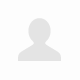
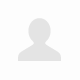

In [60]:
soup3

- 네이버도 크롤링 가능